In [1]:
# Установка transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 31.8 MB/s 
     |████████████████████████████████| 7.6 MB 47.6 MB/s 
     |████████████████████████████████| 163 kB 70.3 MB/s 


In [2]:
import pandas as pd
from itertools import groupby

In [3]:
#import необходимых модулей

import pandas as pd
#from ludwig.api import LudwigModel
#from ludwig.visualize import learning_curves
import yaml
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
from datetime import datetime, timedelta

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt

In [4]:
from matplotlib.pylab import float64
#Считывание данных в DataFrame 

train= pd.read_csv('train_geo.csv', sep=',', index_col=None)
test= pd.read_csv('test_geo.csv', sep=',', index_col=None)
train['Category']=0
train.loc[train['crop']==0,'Category']=1

In [5]:
train

,.geo,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop,Долгота_1,Широта_1,Category
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,...,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3,42.491073,51.414036,0
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,...,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4,50.255451,56.605392,0
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,...,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2,37.996990,53.835904,0
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,...,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5,44.721542,55.935339,0
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,...,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4,34.778299,52.907201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,"{""type"":""Polygon"",""coordinates"":[[[40.90052911...",3772,74,0.028770,0.038282,0.255329,0.148166,0.225421,0.479483,0.071684,...,0.139222,0.009041,0.042483,0.022464,0.017705,0.148440,6,40.900529,50.905277,0
4826,"{""type"":""Polygon"",""coordinates"":[[[40.00883381...",5191,109,0.035939,0.030722,0.033869,0.029646,0.318387,0.247905,0.265180,...,0.000000,0.187236,0.055721,0.044182,0.048316,0.041440,6,40.008834,51.798122,0
4827,"{""type"":""Polygon"",""coordinates"":[[[38.57789936...",5226,58,0.191255,0.063581,0.140111,0.323984,0.000000,0.005056,0.092693,...,0.000000,0.047572,0.007225,0.145505,0.051215,0.079730,6,38.577899,53.192895,0
4828,"{""type"":""Polygon"",""coordinates"":[[[53.31082730...",5390,14,0.291399,0.221428,0.007247,0.055074,0.057781,0.187749,0.112403,...,0.631304,0.694524,0.031836,0.453151,0.000000,0.006495,5,53.310827,55.183098,0


In [6]:
test

,.geo,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,...,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop,Долгота_1,Широта_1
0,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",611,26,0.196691,0.000000,0.259303,0.052522,0.133353,0.000000,0.058353,...,0.188092,0.000000,0.200005,0.714292,0.084197,0.157733,0.197326,?,35.965459,52.383788
1,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",6417,98,0.091192,0.000000,0.125823,0.000000,0.027636,0.433244,0.344155,...,0.067910,0.084682,0.025694,0.000000,0.108945,0.141947,0.000000,?,39.505205,52.066982
2,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",3352,21,0.000000,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,...,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710,?,39.301054,49.945986
3,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",4224,18,0.111243,0.201012,0.000000,0.000000,0.107940,0.000000,0.213204,...,0.114008,0.059159,0.058423,0.108990,0.237742,0.000000,0.000000,?,33.081446,52.551563
4,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",3102,53,0.000000,0.234954,0.000000,0.305964,0.268629,0.305554,0.131192,...,0.209458,0.033658,0.000000,0.048622,0.121296,0.010354,0.000000,?,45.102313,55.371466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,"{""type"":""Polygon"",""coordinates"":[[[38.68082436...",1743,18,0.000000,0.017866,0.212560,0.231169,0.012535,0.000000,0.103303,...,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576,?,38.680824,54.015096
2067,"{""type"":""Polygon"",""coordinates"":[[[56.32489418...",3968,56,0.010670,0.105135,0.170843,0.227927,0.000000,0.000000,0.000000,...,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901,?,56.324894,53.489044
2068,"{""type"":""Polygon"",""coordinates"":[[[37.89523772...",3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.000000,...,0.000000,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436,?,37.895238,53.134645
2069,"{""type"":""Polygon"",""coordinates"":[[[38.98573772...",5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,...,0.053296,0.200393,0.000000,0.040434,0.037837,0.000000,0.165996,?,38.985738,51.858673


In [7]:
train.columns

Index(['.geo', 'id', 'area', 'nd_mean_2021-04-16', 'nd_mean_2021-04-19',
       'nd_mean_2021-04-22', 'nd_mean_2021-04-26', 'nd_mean_2021-04-28',
       'nd_mean_2021-05-02', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-21',
       'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29',
       'nd_mean_2021-06-06', 'nd_mean_2021-06-09', 'nd_mean_2021-06-13',
       'nd_mean_2021-06-16', 'nd_mean_2021-06-18', 'nd_mean_2021-06-19',
       'nd_mean_2021-06-20', 'nd_mean_2021-06-22', 'nd_mean_2021-06-25',
       'nd_mean_2021-06-27', 'nd_mean_2021-07-07', 'nd_mean_2021-07-08',
       'nd_mean_2021-07-09', 'nd_mean_2021-07-13', 'nd_mean_2021-07-15',
       'nd_mean_2021-07-17', 'nd_mean_2021-07-20', 'nd_mean_2021-07-26',
       'nd_mean_2021-07-27', 'nd_mean_2021-07-29', 'nd_mean_2021-07-31',
       'nd_mean_2021-08-07', 'nd_mean_2021-08-12', 'nd_mean_2021-04-15',
       'nd_mean_2021-04-18', 'nd_mean_2021-04-25', 

In [8]:
column_names_to_train =['area', 'nd_mean_2021-04-16', 'nd_mean_2021-04-19',
       'nd_mean_2021-04-22', 'nd_mean_2021-04-26', 'nd_mean_2021-04-28',
       'nd_mean_2021-05-02', 'nd_mean_2021-05-04', 'nd_mean_2021-05-07',
       'nd_mean_2021-05-16', 'nd_mean_2021-05-17', 'nd_mean_2021-05-21',
       'nd_mean_2021-05-26', 'nd_mean_2021-05-27', 'nd_mean_2021-05-29',
       'nd_mean_2021-06-06', 'nd_mean_2021-06-09', 'nd_mean_2021-06-13',
       'nd_mean_2021-06-16', 'nd_mean_2021-06-18', 'nd_mean_2021-06-19',
       'nd_mean_2021-06-20', 'nd_mean_2021-06-22', 'nd_mean_2021-06-25',
       'nd_mean_2021-06-27', 'nd_mean_2021-07-07', 'nd_mean_2021-07-08',
       'nd_mean_2021-07-09', 'nd_mean_2021-07-13', 'nd_mean_2021-07-15',
       'nd_mean_2021-07-17', 'nd_mean_2021-07-20', 'nd_mean_2021-07-26',
       'nd_mean_2021-07-27', 'nd_mean_2021-07-29', 'nd_mean_2021-07-31',
       'nd_mean_2021-08-07', 'nd_mean_2021-08-12', 'nd_mean_2021-04-15',
       'nd_mean_2021-04-18', 'nd_mean_2021-04-25', 'nd_mean_2021-04-27',
       'nd_mean_2021-04-29', 'nd_mean_2021-04-30', 'nd_mean_2021-06-07',
       'nd_mean_2021-06-12', 'nd_mean_2021-06-28', 'nd_mean_2021-08-01',
       'nd_mean_2021-08-11', 'nd_mean_2021-05-01', 'nd_mean_2021-05-03',
       'nd_mean_2021-05-10', 'nd_mean_2021-05-15', 'nd_mean_2021-06-02',
       'nd_mean_2021-06-03', 'nd_mean_2021-07-04', 'nd_mean_2021-08-10',
       'nd_mean_2021-08-23', 'nd_mean_2021-04-20', 'nd_mean_2021-04-23',
       'nd_mean_2021-05-09', 'nd_mean_2021-05-19', 'nd_mean_2021-05-20',
       'nd_mean_2021-06-04', 'nd_mean_2021-06-05', 'nd_mean_2021-06-10',
       'nd_mean_2021-07-05', 'nd_mean_2021-08-13', 'nd_mean_2021-08-27',
       'nd_mean_2021-05-08', 'nd_mean_2021-05-24',  'Долгота_1',
       'Широта_1'
]


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   .geo                2071 non-null   object 
 1   id                  2071 non-null   int64  
 2   area                2071 non-null   int64  
 3   nd_mean_2021-04-16  2071 non-null   float64
 4   nd_mean_2021-04-19  2071 non-null   float64
 5   nd_mean_2021-04-22  2071 non-null   float64
 6   nd_mean_2021-04-26  2071 non-null   float64
 7   nd_mean_2021-04-28  2071 non-null   float64
 8   nd_mean_2021-05-02  2071 non-null   float64
 9   nd_mean_2021-05-04  2071 non-null   float64
 10  nd_mean_2021-05-07  2071 non-null   float64
 11  nd_mean_2021-05-16  2071 non-null   float64
 12  nd_mean_2021-05-17  2071 non-null   float64
 13  nd_mean_2021-05-21  2071 non-null   float64
 14  nd_mean_2021-05-26  2071 non-null   float64
 15  nd_mean_2021-05-27  2071 non-null   float64
 16  nd_mea

In [10]:
# Разобьем трейн на 5 частей и сделаем 5 подвыборок для прогнозирования с переобучением
X_train_1=train.iloc[:950]
X_train_2=train.iloc[950:1900]
X_train_3=train.iloc[1900:2850]
X_train_4=train.iloc[2850:3800]
X_train_5=train.iloc[3800:]

X_train_podvib_1=pd.concat([X_train_2,X_train_3,X_train_4,X_train_5])
X_train_podvib_2=pd.concat([X_train_1,X_train_3,X_train_4,X_train_5])
X_train_podvib_3=pd.concat([X_train_1,X_train_2,X_train_4,X_train_5])
X_train_podvib_4=pd.concat([X_train_1,X_train_2,X_train_3,X_train_5])
X_train_podvib_5=pd.concat([X_train_1,X_train_2,X_train_3,X_train_4])



In [27]:
# Обучение разделению 
xgb_estimator = xgb.XGBClassifier(
    learning_rate =0.015,
     n_estimators=115,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:hinge',#'multi:softmax',
     nthread=4,
     tree_method='gpu_hist',#,gpu_id=0, 
           #predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=34,
     feature_fraction=0.7,
     scale_pos_weight=50)

In [28]:
%%time
# fit first model

xgb_estimator.fit(train[column_names_to_train], train['Category'])

CPU times: user 1.58 s, sys: 19.2 ms, total: 1.6 s
Wall time: 1.59 s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, learning_rate=0.015,
              max_cat_to_onehot=50, max_depth=16, min_child_weight=6,
              n_estimators=115, nthread=4, objective='binary:hinge',
              scale_pos_weight=50, seed=34, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

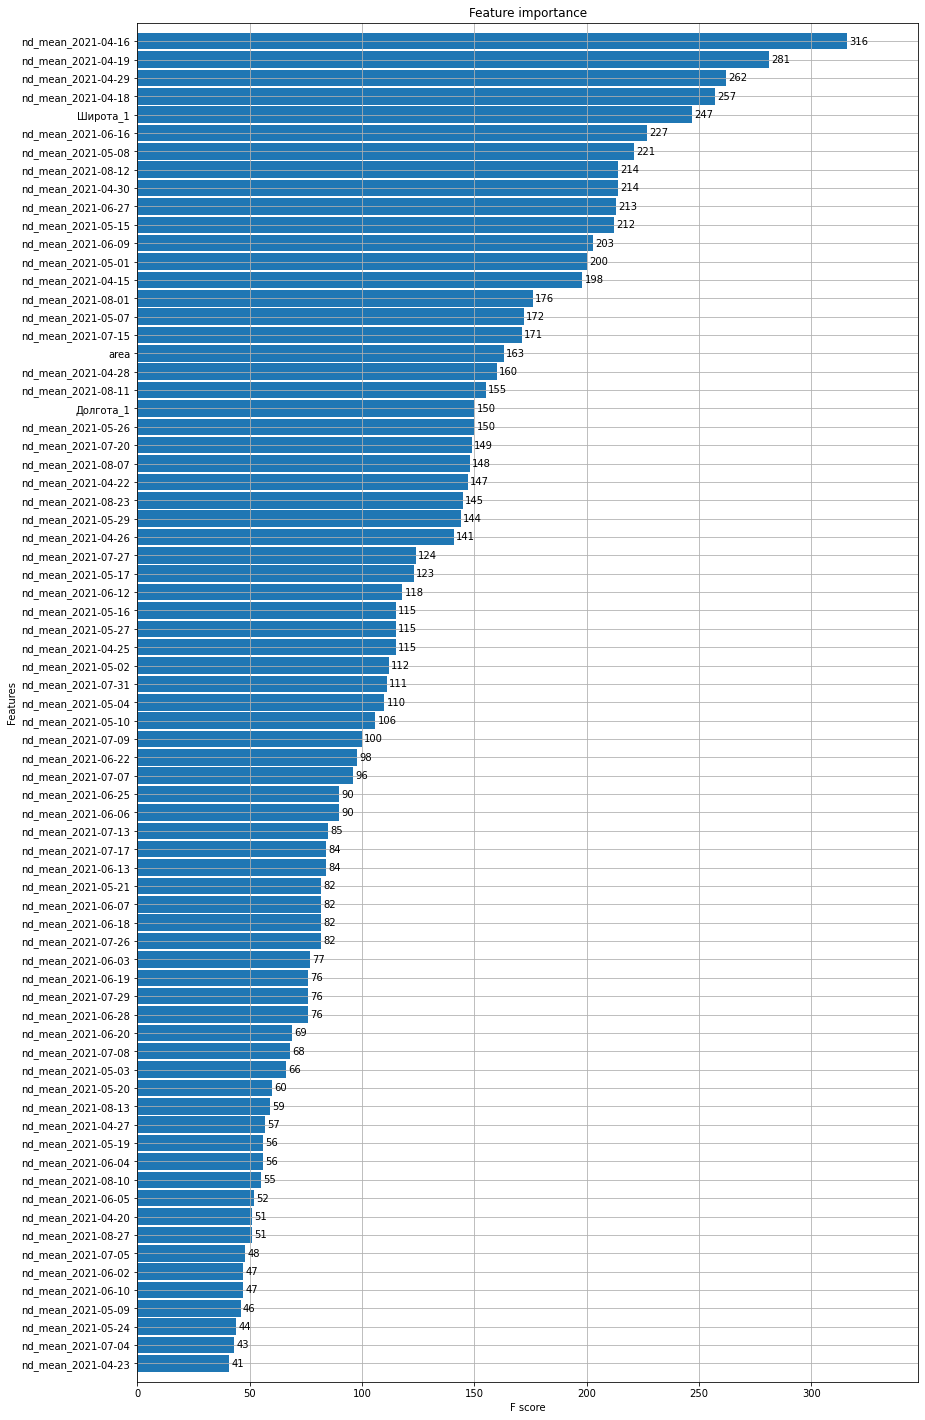

In [29]:
# Важность признаков XGBoost
# 
plt.rcParams["figure.figsize"] = (14, 25)
_ = plot_importance(xgb_estimator, height=0.9)

In [30]:
# Проверка на трейне
predictions = xgb_estimator.predict(train[column_names_to_train])

print("Значение метрики recall на трейне : ", recall_score(predictions, train['Category'], average='macro', zero_division=0))

Значение метрики recall на трейне :  0.9988214636078268


In [31]:
# проверка на тесте
predictions_fin= xgb_estimator.predict(test[column_names_to_train])
test['crop']=predictions_fin
test['crop'].value_counts()


0    1828
1     243
Name: crop, dtype: int64

In [32]:
test.loc[test['crop']==0,'crop']=5
test.loc[test['crop']==1,'crop']=0

In [33]:
test_itog=test[['id','crop']]
test_itog['crop']=test_itog['crop'].astype(int)
test_itog

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,crop
0,611,5
1,6417,5
2,3352,5
3,4224,5
4,3102,5
...,...,...
2066,1743,5
2067,3968,5
2068,3809,5
2069,5485,5


In [34]:
test_itog.to_csv('Казань xgboost 0 34 115.csv', sep=',', index=None)